<a href="https://colab.research.google.com/github/sharmabinaya/Adminator-admin-dashboard/blob/master/Machine_learning__Practice_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
cols = ["fLentgh", "fWidth", "fSize", "fConc1", "fConc2", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class",]
df = pd.read_csv('magic04.data', names=cols)
df.head()


,fLentgh,fWidth,fSize,fConc1,fConc2,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df["class"] = (df['class'] == "g").astype(int)

In [6]:
df.head()

,fLentgh,fWidth,fSize,fConc1,fConc2,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


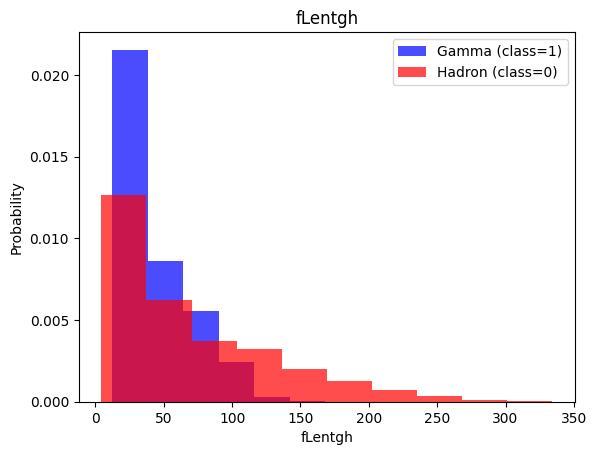

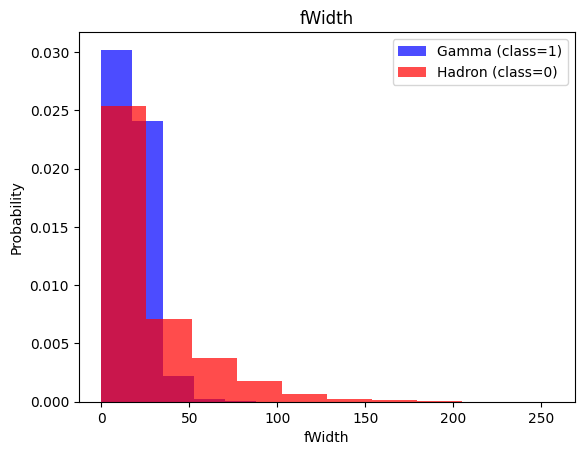

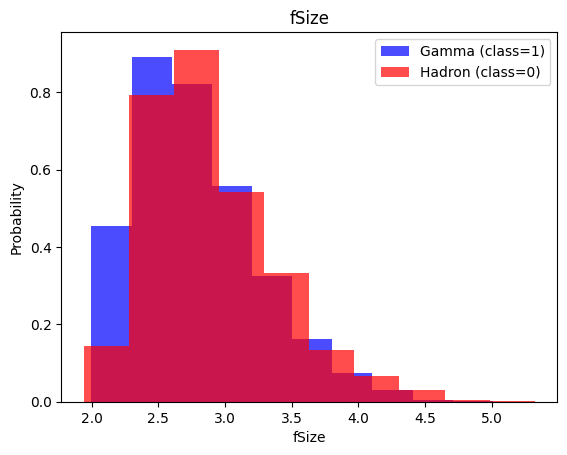

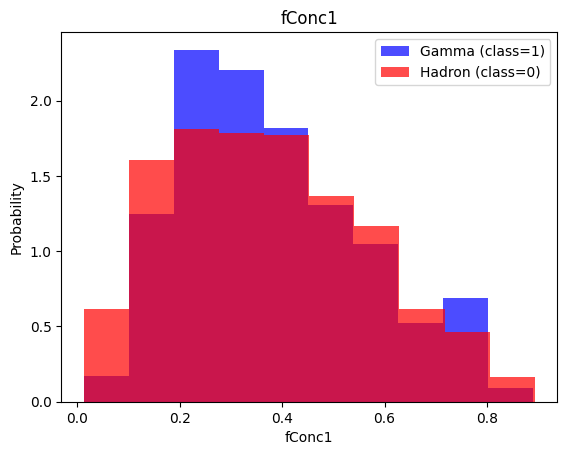

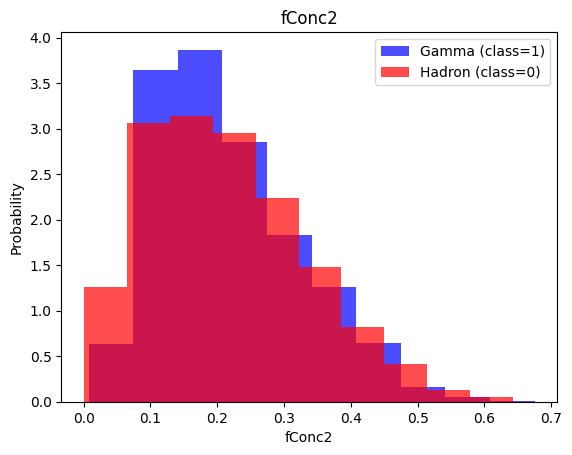

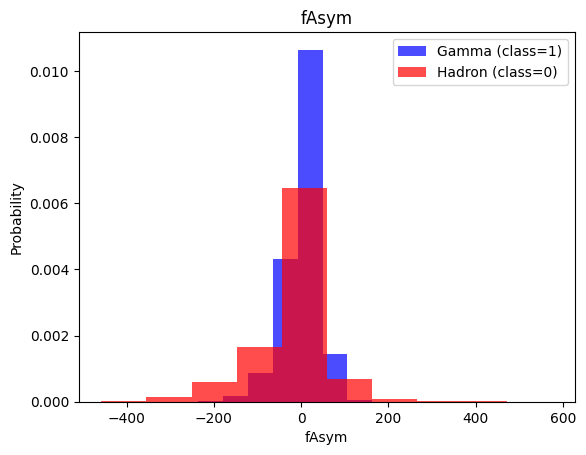

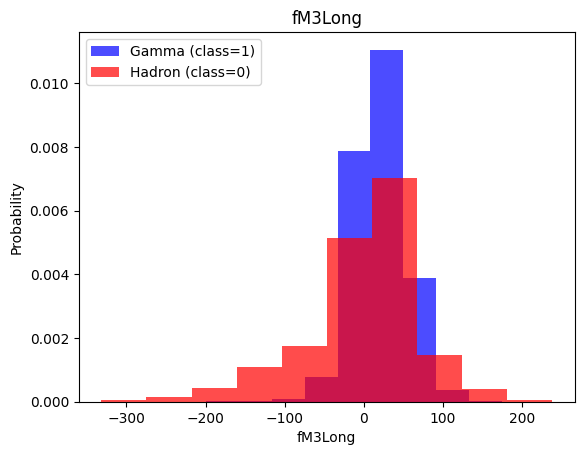

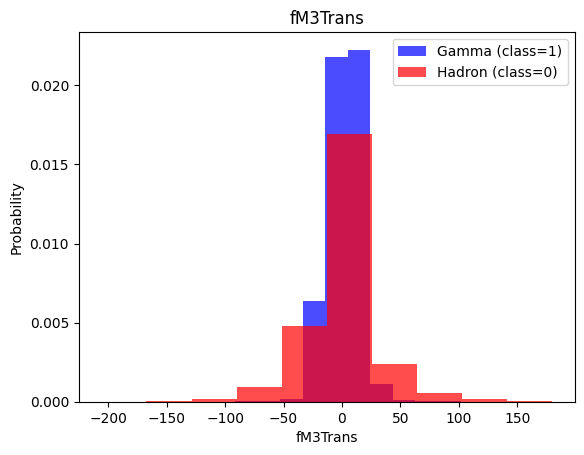

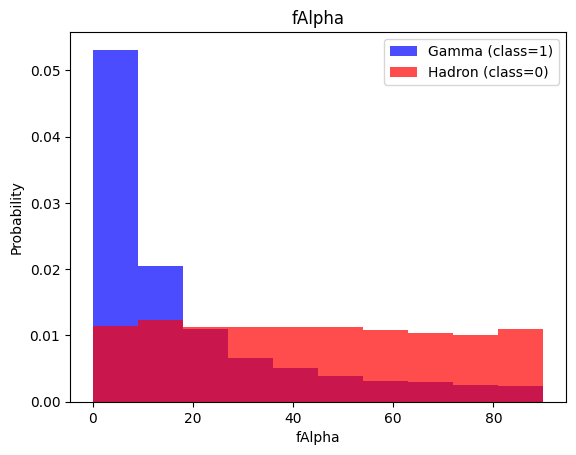

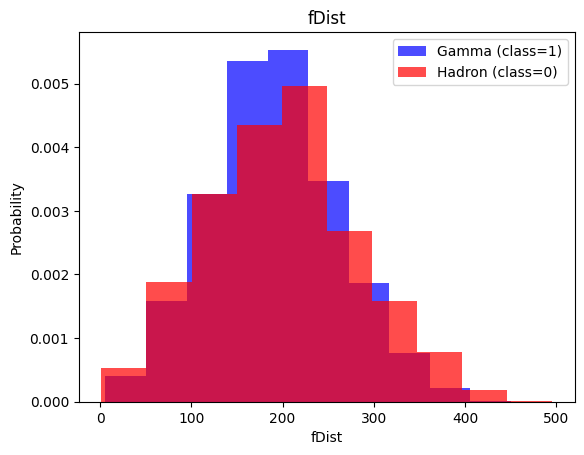

In [7]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', label='Gamma (class=1)', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='Hadron (class=0)', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Velidataion Testing and Traning dataset Model Training

In [8]:
train, valid, test = np.split(df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def scale_dataset(dataframe):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', label='Gamma (class=1)', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='Hadron (class=0)', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [11]:
train, valid, test = np.split(df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [31]:
def scale_dataset(dataframe, oversample=False):
    import numpy as np
    from sklearn.preprocessing import StandardScaler
    from imblearn.over_sampling import RandomOverSampler

    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))
    return data, x, y


In [35]:
scaled_data, x_train, y_train = scale_dataset(train, oversample=True)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [33]:
len(y_train)

14818

In [27]:
sum(y_train == 1)

7409

In [28]:
sum(y_train == 0)

7409

In [34]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'